In [1]:
import numpy
import pandas
import matplotlib.pyplot as plot

In [2]:
data = pandas.read_csv("data.csv")

In [3]:
data[:3]

,loyer,surface
0,1330,37
1,1400,32
2,904,26


In [4]:
data['loyer'][:5]

0    1330
1    1400
2     904
3     955
4    2545
Name: loyer, dtype: int64

In [5]:
data = data[data['loyer'] < 10000]

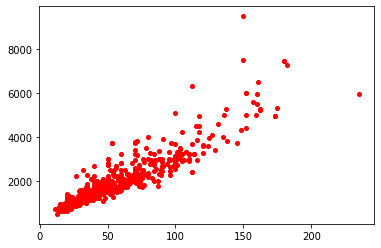

In [6]:
plot.plot(
    data['surface'],
    data['loyer'],
    'ro',
    markersize=4
)
plot.show()

In [7]:
X = numpy.matrix([
    numpy.ones(data.shape[0]),
    data['surface']
]).T

Y = numpy.matrix(data['loyer']).T

In [8]:
# inverse the matrix X.T * X
theta = numpy.linalg.inv(
    X.T.dot(X) 
# then mutiply it with the matixes X.T and Y
).dot(X.T).dot(Y)

In [9]:
theta

matrix([[266.45460292],
        [ 30.66119596]])

In [10]:
# guess the price of an appartment with a given surface
def guess_price(theta, surface):
    return theta.item(0) + theta.item(1) * surface

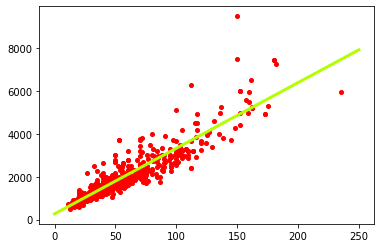

In [11]:
# data markers
plot.plot(
    data['surface'],
    data['loyer'],
    'ro',
    markersize=4
)

# data separator, line
plot.plot(
    [0,250],
    [theta.item(0), guess_price(theta, 250)],
    linestyle="solid",
    c="#b3ff00",
    linewidth=3
)

plot.show()

In [12]:
guess_price(theta, 30)

1186.290481753772